# Cogs 189 Final Project

#### link to Data: https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State?fbclid=IwAR0JLQisC8lDOftb5iPLDqnMqwfOP5M-rrFyaSaFz4JheILl6eC9X-MD8Zw#

### Contributors:

#### Name: Iman Nematollahi, PID , Email: imnemato@ucsd.edu

#### Name: Ricky Martin, PID: A13810245 , Email: rlm005@ucsd.edu

#### Name: Soon Gi Shin, PID , Email: sgs008@ucsd.edu

# Part 1: Raw Data Input
Machine Learning given the Raw Data

## Imports

In [58]:
# IMPORT LIBRARIES
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Data 

In [59]:
# DOWNLOAD THE DATASET AND PERFORM CLEANING
data = arff.loadarff('EEG Eye State.arff')
df = pd.DataFrame(data[0])
df['eyeDetection'] = df['eyeDetection'].replace({b'0': 0, b'1': 1})

In [60]:
# Output data 
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [61]:
# SEE STATS FOR EACH CHANNEL
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


We can see there are some outliers for each channel, looking at the mins and maxs compared to the averages.

## Fixing the Data

In [62]:
## REMOVE OUTLIERS
## -- OUTLLIER = OVER 3 STANDARD DEVIATIONS AWAY FROM THE MEAN

#go through each channel
for col in df[:-1]:
    #get upper and lower thresholds for each channel
    upper_thresh = df[col].mean()+3*df[col].std()
    lower_thresh = df[col].mean()-3*df[col].std()
    #keep rows within 3 standard deviations
    df = df[(df[col]<=upper_thresh) & (df[col]>=lower_thresh)]
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000
mean,4294.532682,4004.400141,4260.261714,4118.347977,4338.674779,4617.843910,4069.972952,4613.648234,4199.338465,4228.770689,4198.893256,4275.634225,4601.229197,4355.065267,0.450388
std,23.365928,23.731113,13.752020,14.826032,10.317981,11.035527,17.106570,12.748024,12.562740,13.379124,15.793105,12.814227,19.929211,23.114763,0.497552
min,4208.720000,3922.560000,4209.740000,4069.740000,4308.720000,4581.540000,4026.150000,4573.850000,4159.490000,4183.590000,4142.560000,4233.850000,4531.790000,4273.850000,0.000000
25%,4280.510000,3989.230000,4250.260000,4107.690000,4331.280000,4611.790000,4056.920000,4605.130000,4190.770000,4220.510000,4189.740000,4267.180000,4590.260000,4341.540000,0.000000
50%,4292.310000,4003.080000,4262.050000,4118.970000,4337.950000,4617.440000,4069.230000,4613.330000,4199.490000,4228.720000,4198.970000,4275.380000,4601.540000,4353.330000,0.000000
75%,4305.640000,4017.950000,4267.180000,4126.150000,4345.640000,4625.130000,4081.030000,4622.560000,4207.690000,4237.440000,4208.720000,4284.100000,4612.820000,4367.690000,1.000000
max,4422.050000,4138.970000,4323.590000,4172.820000,4375.900000,4652.820000,4121.030000,4653.850000,4238.970000,4273.850000,4252.820000,4318.970000,4673.850000,4440.000000,1.000000


1949 rows removed for a remaining total of 13031 samples

Dataset is now clean and there are no outliers

## Seperating Classes/Evening out Class Structure for Machine Learning Input

In [63]:
## SEPERATE BY CLASS

eye_open = df[df['eyeDetection']==0].reset_index(drop=True)
eye_closed = df[df['eyeDetection']==1].reset_index(drop=True)

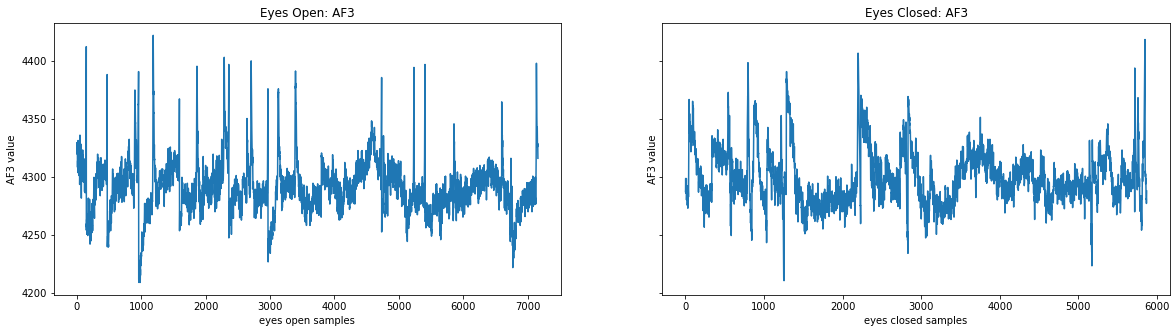

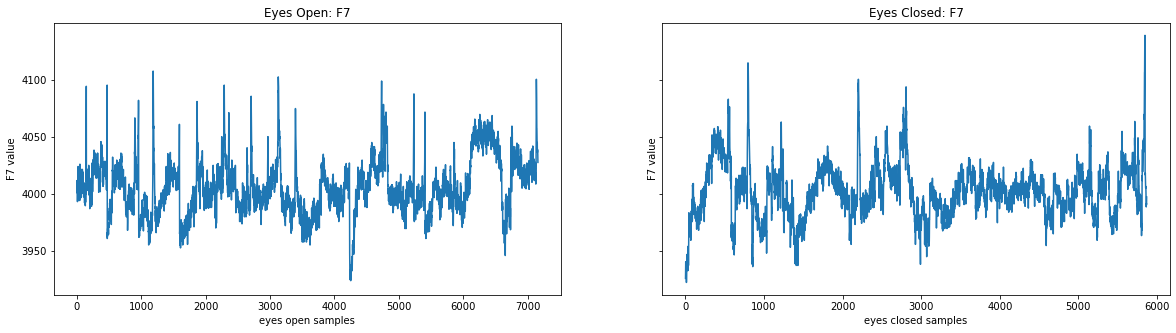

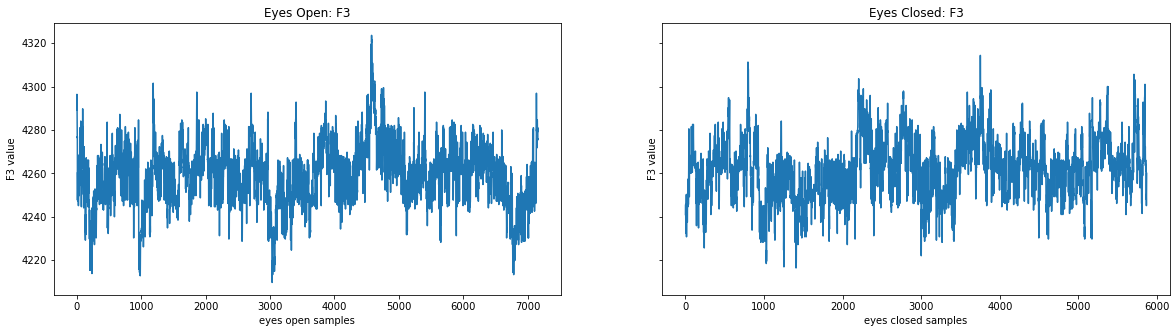

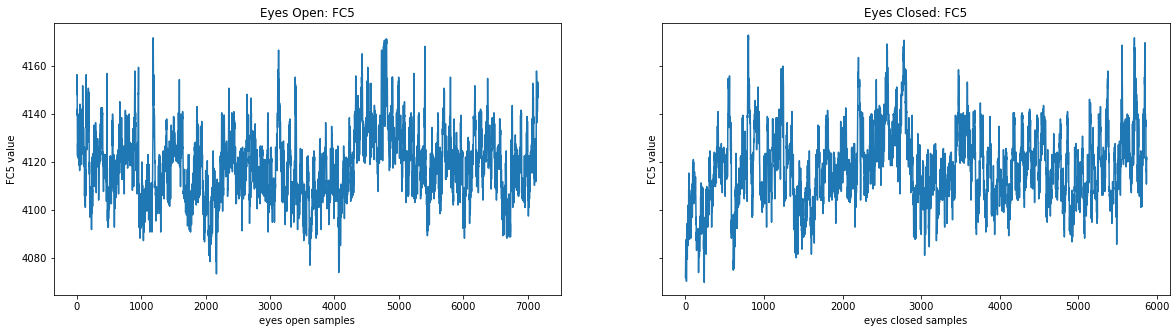

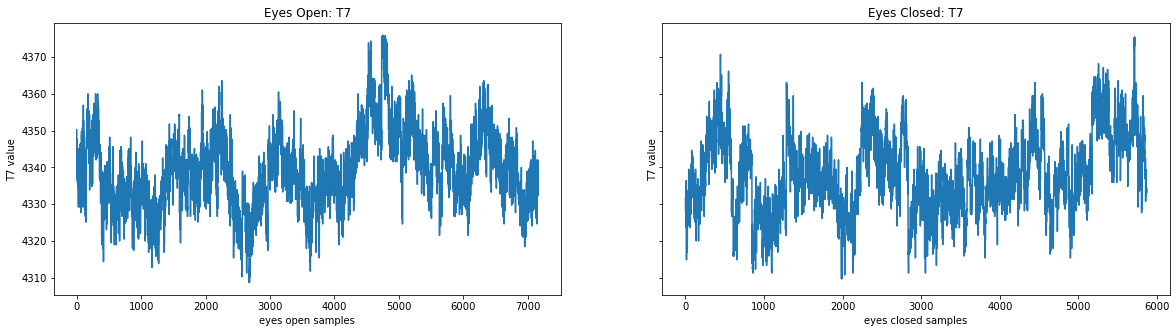

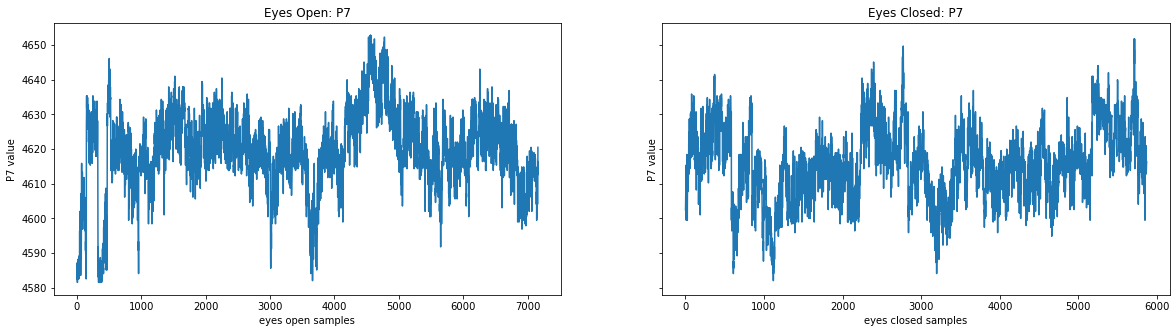

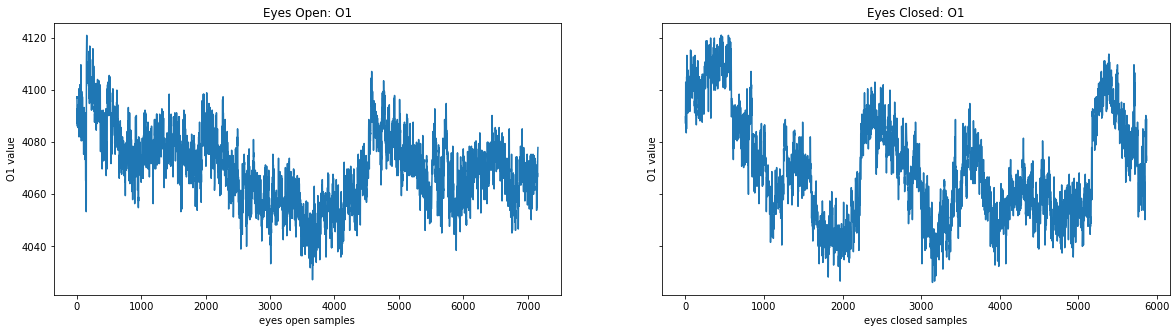

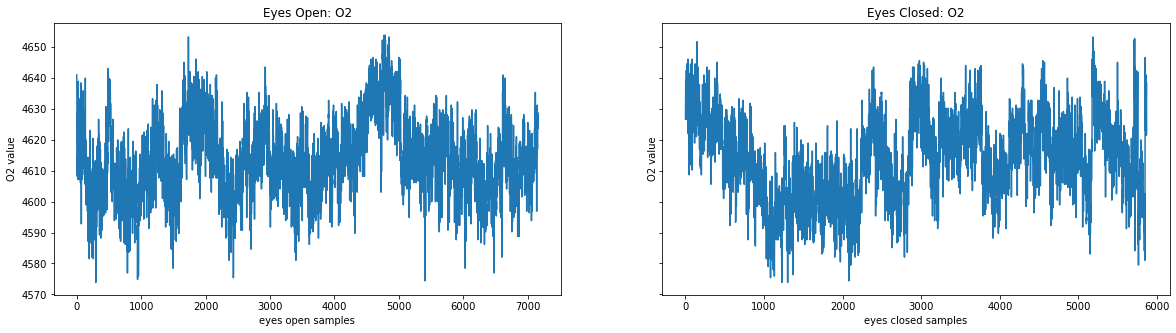

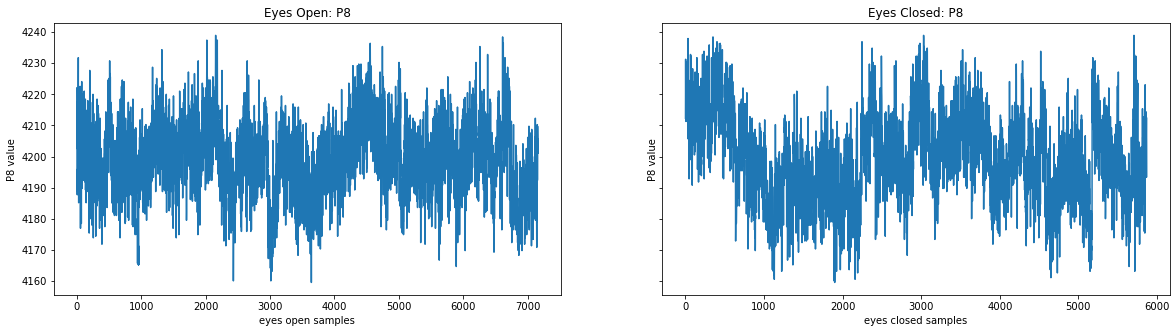

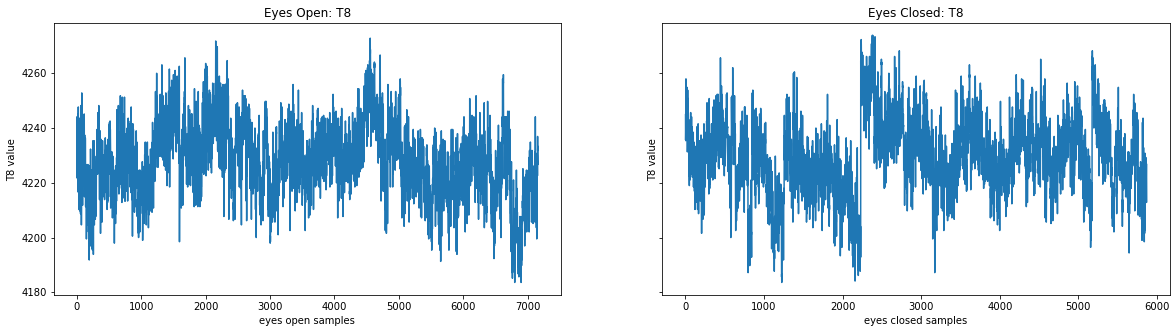

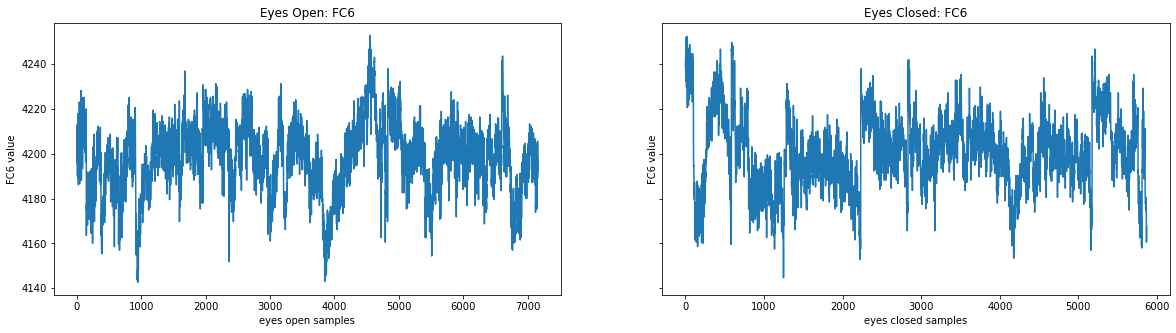

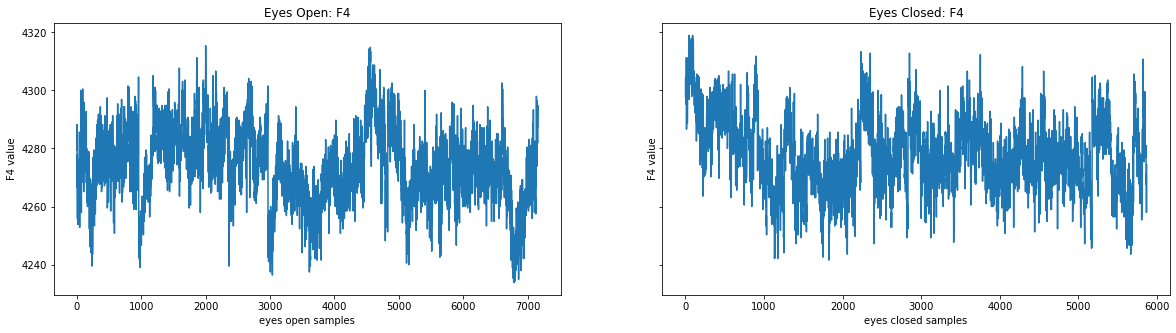

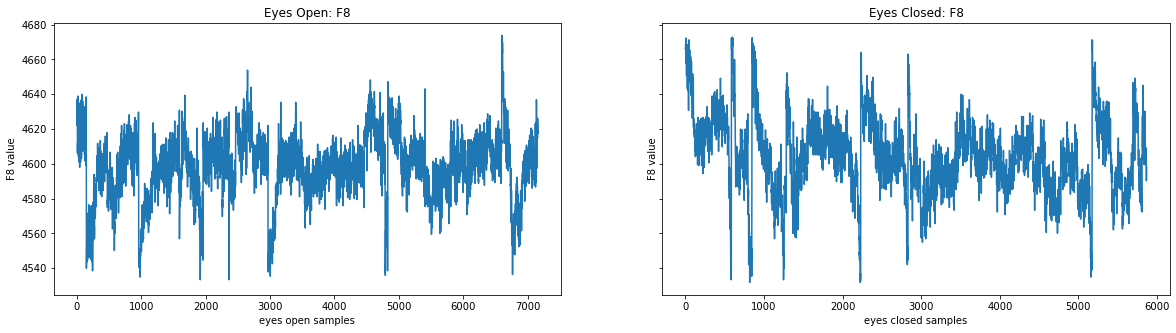

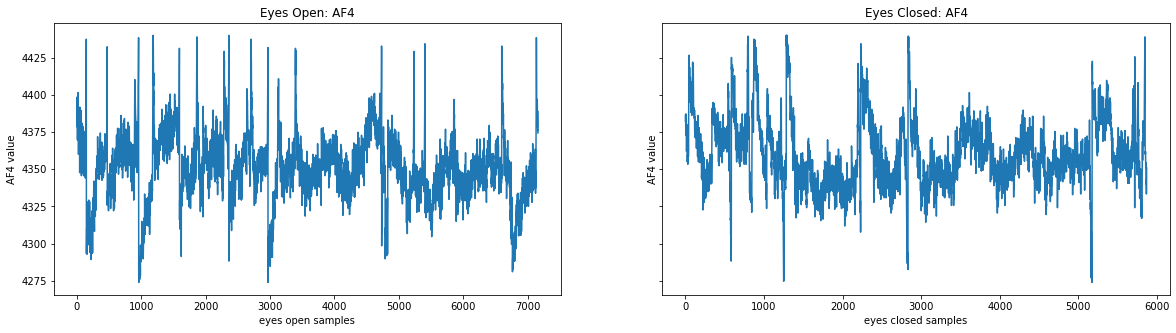

In [64]:
## PLOT TIME SERIES DISTRIBUTIONS FOR EACH CHANNEL - OPEN VS CLOSED

for col in df.columns[:-1]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
    ax1.plot(eye_open[col])
    ax1.set_title('Eyes Open: '+ col)
    ax1.set_xlabel('eyes open samples')
    ax1.set_ylabel(col+' value')
    ax2.plot(eye_closed[col])
    ax2.set_title('Eyes Closed: '+ col)
    ax2.set_xlabel('eyes closed samples')
    ax2.set_ylabel(col+' value')

## Split the Data (75/25 split)

In [65]:
## TAKE FIRST 75% OF EACH SET AS TRAINING, LAST 25% AS TEST
## -- MUST TRAIN/TEST LIKE THIS TO ENSURE MODEL ISNT PREDICTING OFF TIME SERIES

open_size = int(len(eye_open)*.75)
open_train = eye_open[:open_size]
open_test = eye_open[open_size:]

closed_size = int(len(eye_closed)*.75)
closed_train = eye_closed[:closed_size]
closed_test = eye_closed[closed_size:]

training = open_train.append(closed_train)
testing = open_test.append(closed_test)

In [66]:
## ASSIGN TRAIN AND TEST VARIABLES
## -- FOR BASELINE USE ALL 14 CHANNELS

X_train = training.drop('eyeDetection',axis=1)
y_train = training['eyeDetection']

X_test = testing.drop('eyeDetection',axis=1)
y_test = testing['eyeDetection']

## Machine Learning Implementation (Classification)

In [67]:
%%time

## TRYING DIFFERENT MODELS
## -- RANDOM FOREST, KNN, SVM

rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)

Wall time: 13.8 s


## Accuracy of Classification

In [68]:
## COMPARE MODEL PERFORMANCES

rm_raw_acc = accuracy_score(y_test, rf_predictions)
print('Random Forrest accuracy:',rm_raw_acc)

knn_raw_acc = accuracy_score(y_test, knn_predictions)
print('K Nearest Neighbors accuracy:',knn_raw_acc)

svm_raw_acc = accuracy_score(y_test, svm_predictions)
print('SVM accuracy:',svm_raw_acc)

Random Forrest accuracy: 0.523166615526235
K Nearest Neighbors accuracy: 0.5167229211414545
SVM accuracy: 0.31083154341822644


## Feature Importance

Text(0, 0.5, 'Features (Channels)')

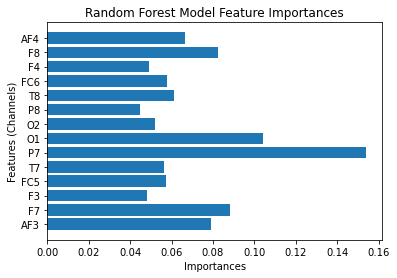

In [69]:
## VISUALIZE IMPORTANCES
plt.barh(X_train.columns,rf.feature_importances_)
plt.title('Random Forest Model Feature Importances')
plt.xlabel('Importances')
plt.ylabel('Features (Channels)')

Text(0, 0.5, 'Features (Channels)')

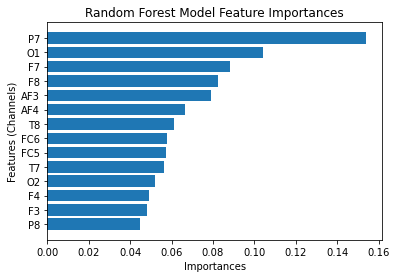

In [70]:
## VISUALIZE IMPORTANCES
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],rf.feature_importances_[sorted_idx])
plt.title('Random Forest Model Feature Importances')
plt.xlabel('Importances')
plt.ylabel('Features (Channels)')

In [71]:
## ORDERED LIST OF MOST IMPORTANT TO LEAST IMPORTANT FEATURES

features = X_train.columns
importances = rf.feature_importances_
indices=np.argsort(importances)[::-1]
list(features[indices])

['P7',
 'O1',
 'F7',
 'F8',
 'AF3',
 'AF4',
 'T8',
 'FC6',
 'FC5',
 'T7',
 'O2',
 'F4',
 'F3',
 'P8']

## Feature Selection w/ Top 5 Features

In [72]:
%%time

## TRY USING SUBSET OF MORE USEFUL FEATURES

new_X_train = X_train[['P7','O1','F7','F8','AF3']]
new_X_test = X_test[['P7','O1','F7','F8','AF3']]

rf = RandomForestClassifier(class_weight='balanced').fit(new_X_train, y_train)
knn = KNeighborsClassifier().fit(new_X_train, y_train)
svm = SVC(class_weight='balanced').fit(new_X_train, y_train)

rf_predictions = rf.predict(new_X_test)
knn_predictions = knn.predict(new_X_test)
svm_predictions = svm.predict(new_X_test)

Wall time: 10.5 s


In [73]:
rm_t5_acc = accuracy_score(y_test, rf_predictions)
print('Random Forrest accuracy:',rm_t5_acc)

knn_t5_acc = accuracy_score(y_test, knn_predictions)
print('K Nearest Neighbors accuracy:',knn_t5_acc)

svm_t5_acc = accuracy_score(y_test, svm_predictions)
print('SVM accuracy:',svm_t5_acc)

Random Forrest accuracy: 0.49861920834611845
K Nearest Neighbors accuracy: 0.45351334765265416
SVM accuracy: 0.48481129180730287


As we can see the accuracies are still not too good so we wanted to now shift our focus to extracting important information from the signals using statistics

# Part 2: Statistical Significance Input

## Statistical Analysis using Statistics (attempt 1)

In [74]:
columns = ['AF3_std','AF3_mean','F7_std','F7_mean','F3_std','F3_mean','FC5_std','FC5_mean',
           'T7_std','T7_mean','P7_std','P7_mean','O1_std','O1_mean','O2_std','O2_mean',
           'P8_std','P8_mean','T8_std','T8_mean','FC6_std','FC6_mean','F4_std','F4_mean',
           'F8_std','F8_mean','AF4_std','AF4_mean']

In [75]:
## TRY CHUNKING THE DATA INTO 10 ROW CHUNKS
## GET THE STANDARD DEVIATION AND MEAN OF EACH CHANNEL ACROSS 10 ROWS FOR EVERY NEW SAMPLE
chunked_open = pd.DataFrame()
for i in range(0,len(eye_open),10):
    chunk = eye_open[i:i+10]
    row = []
    for col in eye_open.columns[:-1]:
        std = chunk[col].std()
        mean = chunk[col].mean()
        row.append(std)
        row.append(mean)
    chunked_open = pd.concat([chunked_open, pd.DataFrame([row])])
chunked_open.columns = columns
chunked_open['eyeDetection']=0

chunked_closed = pd.DataFrame()
for i in range(0,len(eye_closed),10):
    chunk = eye_closed[i:i+10]
    row = []
    for col in eye_closed.columns[:-1]:
        std = chunk[col].std()
        mean = chunk[col].mean()
        row.append(std)
        row.append(mean)
    chunked_closed = pd.concat([chunked_closed, pd.DataFrame([row])])
chunked_closed.columns = columns
chunked_closed['eyeDetection']=1

In [76]:
 chunked_open.head()

,AF3_std,AF3_mean,F7_std,F7_mean,F3_std,F3_mean,FC5_std,FC5_mean,T7_std,T7_mean,...,T8_mean,FC6_std,FC6_mean,F4_std,F4_mean,F8_std,F8_mean,AF4_std,AF4_mean,eyeDetection
0,3.113380,4325.487,3.702939,4007.847,7.971885,4286.358,5.856945,4149.026,3.497822,4344.307,...,4231.487,5.692713,4207.077,6.999172,4278.719,4.835668,4630.258,6.612564,4389.383,0
0,4.370553,4311.284,4.216565,4000.768,5.094059,4254.462,4.238524,4125.332,2.751129,4339.950,...,4223.538,6.003505,4196.565,7.518978,4264.053,6.380762,4612.512,5.102060,4374.922,0
0,8.258998,4317.283,7.390927,4010.153,7.231584,4258.975,5.952204,4130.104,4.478323,4337.283,...,4231.845,11.079598,4202.564,7.024105,4266.410,12.912807,4620.307,13.884578,4380.410,0
0,5.330648,4308.565,5.197594,4002.873,6.053293,4257.487,2.912942,4122.309,4.059445,4334.205,...,4228.102,8.350475,4204.822,4.760596,4269.641,8.563932,4618.616,5.229192,4373.130,0
0,10.520408,4310.770,10.345986,4007.744,8.942679,4265.488,7.764772,4124.410,5.083271,4338.667,...,4229.025,12.076341,4208.103,11.018860,4272.872,13.861239,4621.487,15.769072,4373.231,0


#### Split new Data

In [77]:
## TAKE FIRST 75% OF EACH SET AS TRAINING, LAST 25% AS TEST
## -- MUST TRAIN/TEST LIKE THIS TO ENSURE MODEL ISNT PREDICTING OFF TIME SERIES

open_size = int(len(chunked_open)*.75)
open_train = chunked_open[:open_size]
open_test = chunked_open[open_size:]

closed_size = int(len(chunked_closed)*.75)
closed_train = chunked_closed[:closed_size]
closed_test = chunked_closed[closed_size:]

training = open_train.append(closed_train)
testing = open_test.append(closed_test)

In [78]:
## ASSIGN TRAIN AND TEST VARIABLES
## -- FOR BASELINE USE ALL 14 CHANNELS

X_train = training.drop('eyeDetection',axis=1)
y_train = training['eyeDetection']

X_test = testing.drop('eyeDetection',axis=1)
y_test = testing['eyeDetection']

#### Train with new data

In [79]:
%%time

## TRYING DIFFERENT MODELS
## -- RANDOM FOREST, KNN, SVM

rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)

Wall time: 1.14 s


In [80]:
## COMPARE MODEL PERFORMANCES

rm_S1_acc = accuracy_score(y_test, rf_predictions)
print('Random Forrest accuracy:',rm_S1_acc)

knn_S1_acc = accuracy_score(y_test, knn_predictions)
print('K Nearest Neighbors accuracy:',knn_S1_acc)

svm_S1_acc = accuracy_score(y_test, svm_predictions)
print('SVM accuracy:',svm_S1_acc)

Random Forrest accuracy: 0.5871559633027523
K Nearest Neighbors accuracy: 0.5535168195718655
SVM accuracy: 0.5504587155963303


#### Important Features

Text(0, 0.5, 'Features (Channels)')

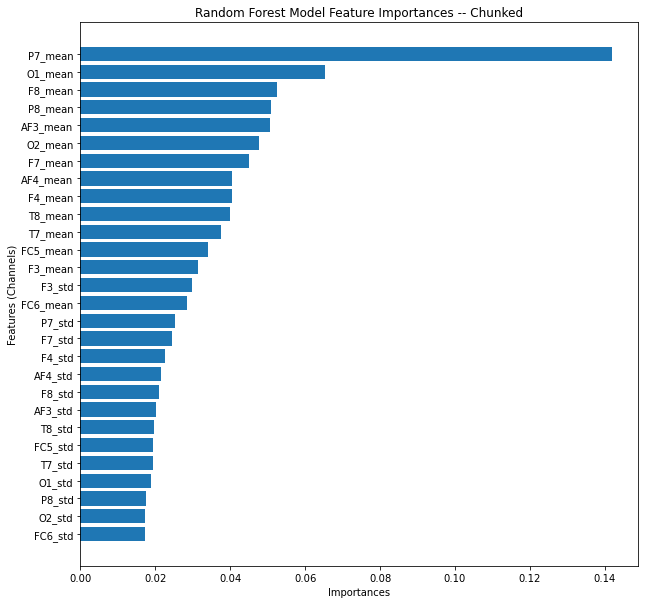

In [81]:
plt.figure(figsize=(10,10))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],rf.feature_importances_[sorted_idx])
plt.title('Random Forest Model Feature Importances -- Chunked')
plt.xlabel('Importances')
plt.ylabel('Features (Channels)')

As we can see this performed slightly better so we will now attempt a similar test using more statistics

## Statistical Analysis using Statistics (attempt 2)

In [82]:
columns = ['AF3_std','AF3_m','AF3_mad','AF3_r','F7_std','F7_m','F7_mad','F7_r',
           'F3_std','F3_m','F3_mad','F3_r','FC5_std','FC5_m','FC5_mad','FC5_r',
           'T7_std','T7_m','T7_mad','T7_r','P7_std','P7_m','P7_mad','P7_r',
           'O1_std','O1_m','O1_mad','O1_r','O2_std','O2_m','O2_mad','O2_r',
           'P8_std','P8_m','P8_mad','p8_r','T8_std','T8_m','T8_mad','T8_r',
           'FC6_std','FC6_m','FC6_mad','FC6_r','F4_std','F4_m','F4_mad','F4_r',
           'F8_std','F8_m','F8_mad','F8_r','AF4_std','AF4_m','AF4_mad','AF4_r']

In [83]:
## TRY CHUNKING THE DATA INTO 10 ROW CHUNKS
## GET THE STANDARD DEVIATION AND MEAN OF EACH CHANNEL ACROSS 10 ROWS FOR EVERY NEW SAMPLE
chunked_open = pd.DataFrame()
for i in range(0,len(eye_open),10):
    chunk = eye_open[i:i+10]
    row = []
    for col in eye_open.columns[:-1]:
        std = chunk[col].std()
        mean = chunk[col].mean()
        mad = chunk[col].mad()
        rang = chunk[col].max() - chunk[col].min()
        
        row.append(std)
        row.append(mean)
        row.append(mad)
        row.append(rang)
    chunked_open = pd.concat([chunked_open, pd.DataFrame([row])])
chunked_open.columns = columns
chunked_open['eyeDetection']=0

chunked_closed = pd.DataFrame()
for i in range(0,len(eye_closed),10):
    chunk = eye_closed[i:i+10]
    row = []
    for col in eye_closed.columns[:-1]:
        std = chunk[col].std()
        mean = chunk[col].mean()
        mad = chunk[col].mad()
        rang = chunk[col].max() - chunk[col].min()
        
        row.append(std)
        row.append(mean)
        row.append(mad)
        row.append(rang)
    chunked_closed = pd.concat([chunked_closed, pd.DataFrame([row])])
chunked_closed.columns = columns
chunked_closed['eyeDetection']=1

In [84]:
 chunked_open.head()

,AF3_std,AF3_m,AF3_mad,AF3_r,F7_std,F7_m,F7_mad,F7_r,F3_std,F3_m,...,F4_r,F8_std,F8_m,F8_mad,F8_r,AF4_std,AF4_m,AF4_mad,AF4_r,eyeDetection
0,3.113380,4325.487,2.2642,9.74,3.702939,4007.847,3.1250,10.76,7.971885,4286.358,...,21.54,4.835668,4630.258,4.0000,15.39,6.612564,4389.383,5.0464,20.00,0
0,4.370553,4311.284,3.6912,13.33,4.216565,4000.768,3.5380,12.82,5.094059,4254.462,...,20.51,6.380762,4612.512,4.8624,18.47,5.102060,4374.922,4.5640,12.31,0
0,8.258998,4317.283,7.0270,23.07,7.390927,4010.153,5.5176,24.10,7.231584,4258.975,...,20.51,12.912807,4620.307,11.3850,34.87,13.884578,4380.410,10.4620,41.54,0
0,5.330648,4308.565,4.1240,16.41,5.197594,4002.873,4.1444,16.41,6.053293,4257.487,...,15.39,8.563932,4618.616,6.5536,27.18,5.229192,4373.130,4.3680,15.89,0
0,10.520408,4310.770,8.2040,35.90,10.345986,4007.744,7.7548,31.79,8.942679,4265.488,...,32.82,13.861239,4621.487,11.9596,36.92,15.769072,4373.231,12.6566,44.10,0


#### Split New Data

In [85]:
## TAKE FIRST 75% OF EACH SET AS TRAINING, LAST 25% AS TEST
## -- MUST TRAIN/TEST LIKE THIS TO ENSURE MODEL ISNT PREDICTING OFF TIME SERIES

open_size = int(len(chunked_open)*.75)
open_train = chunked_open[:open_size]
open_test = chunked_open[open_size:]

closed_size = int(len(chunked_closed)*.75)
closed_train = chunked_closed[:closed_size]
closed_test = chunked_closed[closed_size:]

training = open_train.append(closed_train)
testing = open_test.append(closed_test)

In [86]:
## ASSIGN TRAIN AND TEST VARIABLES
## -- FOR BASELINE USE ALL 14 CHANNELS

X_train = training.drop('eyeDetection',axis=1)
y_train = training['eyeDetection']

X_test = testing.drop('eyeDetection',axis=1)
y_test = testing['eyeDetection']

#### Train with new Data

In [87]:
%%time

## TRYING DIFFERENT MODELS
## -- RANDOM FOREST, KNN, SVM

rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)

Wall time: 1.61 s


In [88]:
## COMPARE MODEL PERFORMANCES

rm_S2_acc = accuracy_score(y_test, rf_predictions)
print('Random Forrest accuracy:',rm_S2_acc)

knn_S2_acc = accuracy_score(y_test, knn_predictions)
print('K Nearest Neighbors accuracy:',knn_S2_acc)

svm_S2_acc = accuracy_score(y_test, svm_predictions)
print('SVM accuracy:',svm_S2_acc)

Random Forrest accuracy: 0.5779816513761468
K Nearest Neighbors accuracy: 0.5321100917431193
SVM accuracy: 0.5504587155963303


#### Important Features

Text(0, 0.5, 'Features (Channels)')

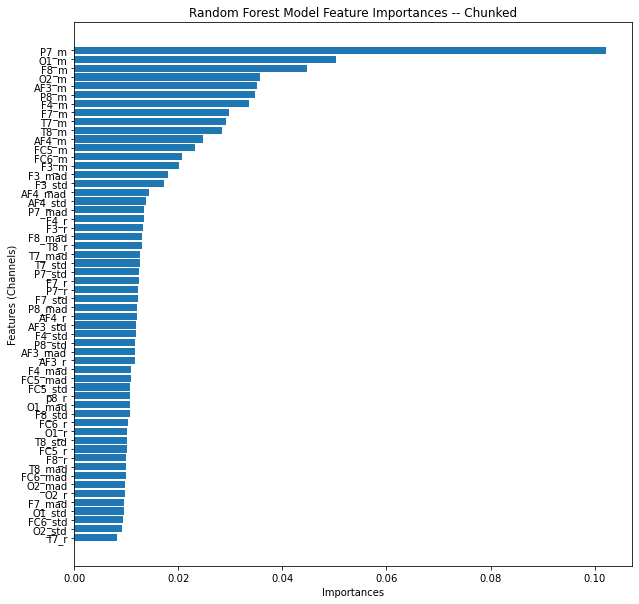

In [89]:
plt.figure(figsize=(10,10))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],rf.feature_importances_[sorted_idx])
plt.title('Random Forest Model Feature Importances -- Chunked')
plt.xlabel('Importances')
plt.ylabel('Features (Channels)')

Notice the Importance of P7

## Graphing Best accuracies

In [90]:
test_models = pd.DataFrame({
    'Model': ['Random Forest Raw', 'KNN Raw','SVM Raw','Random Forest Top 5', 'KNN Top 5','SVM Top 5',
              'Random Forest Stats 1', 'KNN Stats 1','SVM Stats 1','Random Forest Stats 2',
              'KNN Stats 2','SVM Stats 2',],
    
    'Score': [rm_raw_acc, knn_raw_acc, svm_raw_acc, rm_t5_acc, knn_t5_acc, svm_t5_acc, 
             rm_S1_acc, knn_S1_acc, svm_S1_acc, rm_S2_acc, knn_S2_acc, svm_S2_acc, ]
    })

In [91]:
test_models.sort_values(by='Score', ascending=False)

,Model,Score
6,Random Forest Stats 1,0.587156
9,Random Forest Stats 2,0.577982
7,KNN Stats 1,0.553517
8,SVM Stats 1,0.550459
11,SVM Stats 2,0.550459
10,KNN Stats 2,0.532110
0,Random Forest Raw,0.523167
1,KNN Raw,0.516723
3,Random Forest Top 5,0.498619
5,SVM Top 5,0.484811


## Part 3: Adjacent Observations

Based off of the findings above, accuracy can be improved. One method that can combat this is including a system that allows for memory of the timestamps and value for each observation. Meaning we cannot just shuffle or split the data, we need to section off the data and use it in a way that gains benefit from the time series element. In summary we use the entire history to predict each labeling line by line.

In [92]:
X, y = np.array(df)[:, :-1], np.array(df)[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=1)

In [93]:
## Nevermind on Random Forest this would take forever
## Each RM model take about 10 seconds to train fit so this would take like 10*1400 seconds
## which is around 4 hours

In [94]:
%%time
# KNN Implemenation
sections_X, sections_Y = list(X_train), list(y_train)
pred_knn = []

for i in tqdm(range(len(y_test))):
    
    model = KNeighborsClassifier().fit(np.array(sections_X), np.array(sections_Y))
    
    yhat = model.predict([X_test[i, :]])[0]
    
    # store predicted y
    pred_knn.append(yhat)
    
    # add real observation to Section for next round
    sections_X.append(X_test[i, :])
    sections_Y.append(y_test[i])

# Print Accuracies
knn_AO_acc = accuracy_score(y_test, pred_knn)
print('K Nearest Neighbors accuracy:',knn_AO_acc)

100%|██████████| 1304/1304 [02:28<00:00,  8.78it/s]

K Nearest Neighbors accuracy: 0.9493865030674846
Wall time: 2min 28s


In [95]:
## Nevermind on SVM this would take forever
## Each SVM model take about 12 seconds to train fit so this would take like 12*1400 seconds
## which is around 4 hours

In [96]:
################################################################################################################

## ****************Helper Function Below, Can Ignore****************

### Imports

In [92]:
import scipy as sp
from scipy import signal
import seaborn as sns
import pywt

In [93]:
#eye_open.resample('1000ms')
#df2_resample_lst = [explode_extended(df).resample(size, on='Time').sum() * mbit_rate for df in df2]

In [94]:
(cA, cD) = pywt.dwt(df['AF3'], 'db1')

In [95]:
features = pd.DataFrame()
for i in range(0,len(eye_open),10):
    chunk = eye_open[i:i+10]
    row = []
    for col in eye_open.columns:
        (cA, cD) = pywt.dwt(chunk[col], 'db1')
        row.append(list(cA))
    features = pd.concat([features, pd.DataFrame([row])])
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"[6119.1960183712035, 6121.006211731043, 6114.4...","[5666.647678411814, 5669.907440673085, 5668.45...","[6069.154071466633, 6075.312971530768, 6064.43...","[5866.8154660301025, 5877.690768324751, 5872.2...","[6146.39134517564, 6138.047485157638, 6147.112...","[6486.163224603587, 6481.446822373073, 6486.89...","[5794.2875234837975, 5794.2875234837975, 5790....","[6561.950929411161, 6548.537113772053, 6536.92...","[5962.904206525543, 5957.466555378217, 5949.12...","[5985.750826625679, 5980.306104410543, 5994.08...","[5953.110777606108, 5952.028904230893, 5955.64...","[6052.8340469568475, 6059.721267005604, 6059.3...","[6553.974764919377, 6548.537113772053, 6548.53...","[6206.947969916456, 6212.38562106378, 6214.195...","[0.0, 0.0, 0.0, 0.0, 0.0]"
0,"[6098.887911615528, 6095.988773812662, 6095.62...","[5653.948040621704, 5660.114011753651, 5657.94...","[6015.484666774573, 6019.10505349425, 6012.585...","[5841.069708127099, 5833.807721484314, 5833.80...","[6134.427098437963, 6137.326236240828, 6134.05...","[6481.453893440885, 6484.713655702155, 6484.34...","[5781.227261235283, 5784.854719022769, 5788.12...","[6523.512604785861, 6537.654740409592, 6539.46...","[5928.8216596723505, 5954.928042033758, 5945.8...","[5971.608691001949, 5975.596773247841, 5975.59...","[5930.999548558404, 5934.980559736485, 5934.98...","[6023.100206807952, 6037.242342431684, 6027.08...","[6519.156827013751, 6520.9740914414015, 6516.9...","[6180.473892028831, 6185.190294259344, 6186.27...","[0.0, 0.0, 0.0, 0.0, 0.0]"
0,"[6120.6455872726365, 6115.207936125313, 6101.7...","[5682.960631853788, 5676.434036263436, 5667.36...","[6031.076371299737, 6027.44891351225, 6016.212...","[5849.406497077289, 5847.5963037174515, 5836.3...","[6137.326236240828, 6133.698778453341, 6137.68...","[6486.163224603588, 6485.434904618965, 6485.80...","[5785.215343481174, 5780.873707844689, 5781.23...","[6530.767520360834, 6542.010518181702, 6557.23...","[5952.3895286892985, 5970.519746558921, 5968.7...","[6000.253586707815, 5996.986753378734, 5996.26...","[5963.993150968568, 5952.028904230893, 5944.41...","[6044.857882465062, 6039.780855776144, 6032.88...","[6555.784958279215, 6549.258362688863, 6534.02...","[6223.9892433430505, 6197.154540997022, 6199.3...","[0.0, 0.0, 0.0, 0.0, 0.0]"
0,"[6090.544051597526, 6101.426424959987, 6093.08...","[5659.39276283684, 5664.837485051977, 5659.392...","[6026.367040137035, 6032.893635727387, 6015.84...","[5828.3771414048015, 5835.264361453559, 5826.9...","[6124.273045060125, 6131.881514025692, 6125.72...","[6481.807446831479, 6484.713655702155, 6487.25...","[5778.695818958635, 5793.198579040771, 5784.13...","[6518.796202555346, 6547.080473802809, 6535.84...","[5930.631853032188, 5959.6373731964595, 5953.8...","[5969.070177657489, 5985.022506641057, 5990.46...","[5945.862933098946, 5952.3895286892985, 5951.6...","[6034.703829087224, 6043.40831356363, 6038.691...","[6529.310880391591, 6536.20517150816, 6540.560...","[6186.279238702372, 6190.62794540667, 6179.031...","[0.0, 0.0, 0.0, 0.0, 0.0]"
0,"[6098.159591630905, 6105.414507205878, 6080.02...","[5661.563580655084, 5669.914511740895, 5659.39...","[6023.821455724763, 6036.153397988656, 6020.20...","[5825.831556992531, 5832.365223650693, 5824.02...","[6125.722613961556, 6138.047485157638, 6136.60...","[6485.074280160559, 6487.612793505019, 6499.94...","[5791.749010139338, 5781.594956761499, 5787.76...","[6535.8445470497545, 6532.577713720672, 6520.9...","[5951.668279772488, 5945.134613114325, 5934.61...","[5998.804017806383, 5992.638046674436, 5961.81...","[5969.430802115894, 5961.454637624109, 5929.18...","[6048.48534025255, 6057.550449187362, 6020.201...","[6552.88582047635, 6551.436251574918, 6512.269...","[6192.805834292723, 6197.161612064833, 6155.81...","[0.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[6077.130235958417, 6061.531460365442, 6052.47...","[5693.475309690032, 5687.677034084302, 5677.16...","[60

In [96]:
features.reset_index(drop=True)[1000:1006]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14


In [97]:
# CHECK IF DATASET IS BALANCED
df['eyeDetection'].value_counts()

0    7162
1    5869
Name: eyeDetection, dtype: int64

In [98]:
# CHECK IF DATATYPES ARE CORRECT
df.dtypes

AF3             float64
F7              float64
F3              float64
FC5             float64
T7              float64
P7              float64
O1              float64
O2              float64
P8              float64
T8              float64
FC6             float64
F4              float64
F8              float64
AF4             float64
eyeDetection      int64
dtype: object

In [80]:
# SPLIT DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X = df.drop('eyeDetection', axis=1)
y = df.eyeDetection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
training = X_train
training['eyeDetection'] = y_train

C:\Users\16618\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [81]:
print(y.value_counts())

0    7162
1    5869
Name: eyeDetection, dtype: int64


In [82]:
# CHECK THAT DATASETS ARE BALANCED
print(y_train.value_counts())
print(y_test.value_counts())

0    5013
1    4108
Name: eyeDetection, dtype: int64
0    2149
1    1761
Name: eyeDetection, dtype: int64


In [83]:
# UPSAMPLE THE MINORITY LABEL
from sklearn.utils import resample
df_majority = training[training.eyeDetection==0]
df_minority = training[training.eyeDetection==1]
# df_majority.shape[0]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.eyeDetection.value_counts()

0    5013
1    5013
Name: eyeDetection, dtype: int64

In [84]:
# SET X AND Y
X = df_upsampled.drop('eyeDetection', axis=1)
y = df_upsampled.eyeDetection

In [85]:
# BASELINE MODEL
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression().fit(X_train, y_train)
# predictions = model.predict(X_test)

In [86]:
# IMPROVED MODEL
from sklearn.ensemble import RandomForestClassifier
fitted_model = RandomForestClassifier(class_weight='balanced').fit(X, y)
predictions = fitted_model.predict(X_test)

In [87]:
# MODEL OUTPUT
predictions

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [88]:
# 1ST PERFORMANCE METRIC
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9135549872122762


In [89]:
# FEATURE SELECTION
from sklearn.feature_selection import RFE
forest = RandomForestClassifier(class_weight='balanced')
rfe = RFE(forest)
rfe = rfe.fit(X_train.drop('eyeDetection', axis=1), y_train.values.ravel())
print(X_train.drop('eyeDetection', axis=1).columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4'],
      dtype='object')
[ True  True False False False  True  True  True False False False False
  True  True]
[1 1 6 3 7 1 1 1 8 5 4 2 1 1]


In [90]:
X_finaltrain = training[['AF3', 'F7', 'P7', 'O1', 'FC6', 'F8', 'AF4']]
y_finaltrain = training.eyeDetection
X_finaltest = X_test[['AF3', 'F7', 'P7', 'O1', 'FC6', 'F8', 'AF4']]
y_finaltest = y_test

final_model = RandomForestClassifier(class_weight='balanced').fit(X_finaltrain, y_finaltrain)
predictions = final_model.predict(X_finaltest)

In [91]:
print(accuracy_score(y_finaltest, predictions))

0.8734015345268542


In [ ]:
---------------------------------------------------------------------------------------------------------

In [ ]:
# RESAMPLING (doesn't work because library is not installed)
from imblearn.over_sampling import SMOTE
smote = SMOTE()#random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=0)
columns = X_train.columns
new_data_X, new_data_y = smote.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=new_data_X, columns=columns)
os_data_y= pd.DataFrame(data=new_data_y, columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['y']==0]))
print("Number of subscription", len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ", len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ", len(os_data_y[os_data_y['y']==1])/len(os_data_X))